In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress
# File to Load (Remember to Change These)
file = "data/Daily_Dow_Jones.csv"

dow_data= pd.read_csv(file)

dow_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/29/1985,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1/30/1985,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1/31/1985,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,2/1/1985,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,2/4/1985,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


In [3]:
#Add Month and year columns
#dow_data['Date'] = pd.to_datetime(dow_data['Date'])
dow_data['year']=pd.DatetimeIndex(dow_data['Date']).year
dow_data['month']=pd.DatetimeIndex(dow_data['Date']).month
dow_data= dow_data.drop(columns=['Open','Low','High','Adj Close','Volume','Date'])
dow_data['date'] = pd.to_datetime(dow_data[['year', 'month']].assign(DAY=1))

dow_data.head()

,Close,year,month,date
0,1292.619995,1985,1,1985-01-01
1,1287.880005,1985,1,1985-01-01
2,1286.770020,1985,1,1985-01-01
3,1277.719971,1985,2,1985-02-01
4,1290.079956,1985,2,1985-02-01


In [4]:
dow_data_monthly= dow_data.groupby(["date"])

avg_close =dow_data_monthly["Close"].mean()

stock_data= pd.DataFrame({"Close Price":avg_close})

stock_data

,Close Price
date,
1985-01-01,1289.090007
1985-02-01,1283.232101
1985-03-01,1268.829997
1985-04-01,1266.358114
1985-05-01,1279.397738
...,...
2020-01-01,28879.994326
2020-02-01,28519.731601
2020-03-01,22637.420810


In [5]:
# File to Load (Remember to Change These)
file2 = "data/Crude_Oil_Prices.csv"

oil_data= pd.read_csv(file2)

oil_data.head()

,Month,Year,Crude Oil Domestic First Purchase Price (Dollars per Barrel),Free on Board Cost of Crude Oil Imports (Dollars per Barrel),Landed Cost of Crude Oil Imports (Dollars per Barrel),"Refiner Acquisition Cost of Crude Oil, Domestic (Dollars per Barrel)","Refiner Acquisition Cost of Crude Oil, Imported (Dollars per Barrel)","Refiner Acquisition Cost of Crude Oil, Composite (Dollars per Barrel)"
0,<<<<<<< HEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1973.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1973.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1973.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1973.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#remove rows before 198
oil_data=oil_data[(oil_data['Year']>1984)]
oil_data['date'] = pd.to_datetime(oil_data[['Year', 'Month']].assign(DAY=1))
oil_data= oil_data.drop(columns=['Free on Board Cost of Crude Oil Imports (Dollars per Barrel)',
                                 'Landed Cost of Crude Oil Imports (Dollars per Barrel)',
                                 'Refiner Acquisition Cost of Crude Oil, Domestic (Dollars per Barrel)',
                                 'Refiner Acquisition Cost of Crude Oil, Imported (Dollars per Barrel)',
                                 'Refiner Acquisition Cost of Crude Oil, Composite (Dollars per Barrel)','Month','Year'])
oil_data

,Crude Oil Domestic First Purchase Price (Dollars per Barrel),date
159,24.26,1985-01-01
160,23.64,1985-02-01
161,23.89,1985-03-01
162,24.19,1985-04-01
163,24.18,1985-05-01
...,...,...
577,54.96,2019-11-01
578,58.41,2019-12-01
579,56.86,2020-01-01
581,NaN,2020-02-01


In [7]:
#Remove the "Not Available Rows"
oil_data= oil_data.rename(columns={"Crude Oil Domestic First Purchase Price (Dollars per Barrel)":'Crude_Oil_Price'})
oil_data= oil_data[['date','Crude_Oil_Price']]
index= oil_data[(oil_data['Crude_Oil_Price'] =='Not Available')].index

oil_data.drop(index, inplace=True)
oil_data= oil_data.dropna()
oil_data

,date,Crude_Oil_Price
159,1985-01-01,24.26
160,1985-02-01,23.64
161,1985-03-01,23.89
162,1985-04-01,24.19
163,1985-05-01,24.18
...,...,...
575,2019-09-01,55.07
576,2019-10-01,53.14
577,2019-11-01,54.96
578,2019-12-01,58.41


In [8]:
combined_data=oil_data.merge(stock_data, on='date')
combined_data

,date,Crude_Oil_Price,Close Price
0,1985-01-01,24.26,1289.090007
1,1985-02-01,23.64,1283.232101
2,1985-03-01,23.89,1268.829997
3,1985-04-01,24.19,1266.358114
4,1985-05-01,24.18,1279.397738
...,...,...,...
416,2019-09-01,55.07,26900.213964
417,2019-10-01,53.14,26736.797724
418,2019-11-01,54.96,27797.046093
419,2019-12-01,58.41,28167.005768


In [9]:
combined_data= combined_data.astype({'Crude_Oil_Price': float})

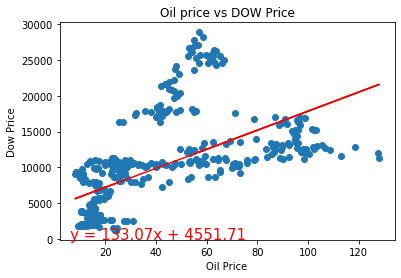

In [10]:
#Create Linear Regression
x_values = combined_data['Crude_Oil_Price']
y_values = combined_data['Close Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Oil Price')
plt.ylabel('Dow Price')
plt.title("Oil price vs DOW Price")
plt.show()

In [11]:
oil = combined_data.iloc[:, 1]
dow = combined_data.iloc[:, 2]

correlation = st.pearsonr(oil, dow)

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.59


In [12]:
#combined_data.to_csv(f"data/oil_dow_prices.csv")

In [13]:
file = "data/us_gold_prices.csv"
gold_data= pd.read_csv(file)

gold_data.head()

,Name,US dollar
0,12/31/1978,226.0
1,1/31/1979,233.7
2,2/28/1979,251.3
3,3/30/1979,240.1
4,4/30/1979,245.3


In [14]:
#Add Month and year columns

gold_data['year']=pd.DatetimeIndex(gold_data['Name']).year
gold_data['month']=pd.DatetimeIndex(gold_data['Name']).month
gold_data=gold_data[(gold_data['year']>1984)]
#gold_data= gold_data.drop(columns=['Open','Low','High','Adj Close','Volume','Date'])
gold_data['date'] = pd.to_datetime(gold_data[['year', 'month']].assign(DAY=1))

gold_data.dtypes

gold_data= gold_data.astype({'US dollar': float})

gold_data_monthly= gold_data.groupby(["date"])

avg_price =gold_data_monthly["US dollar"].mean()

gold_prices= pd.DataFrame({"Monthly Gold AVG":avg_price})


gold_prices

,Monthly Gold AVG
date,
1985-01-01,306.7
1985-02-01,287.8
1985-03-01,329.3
1985-04-01,321.4
1985-05-01,314.0
...,...
2019-12-01,1514.8
2020-01-01,1584.2
2020-02-01,1609.9


In [15]:
combined_data2=gold_prices.merge(combined_data, on='date')
combined_data2

,date,Monthly Gold AVG,Crude_Oil_Price,Close Price
0,1985-01-01,306.7,24.26,1289.090007
1,1985-02-01,287.8,23.64,1283.232101
2,1985-03-01,329.3,23.89,1268.829997
3,1985-04-01,321.4,24.19,1266.358114
4,1985-05-01,314.0,24.18,1279.397738
...,...,...,...,...
416,2019-09-01,1485.3,55.07,26900.213964
417,2019-10-01,1511.0,53.14,26736.797724
418,2019-11-01,1460.2,54.96,27797.046093
419,2019-12-01,1514.8,58.41,28167.005768


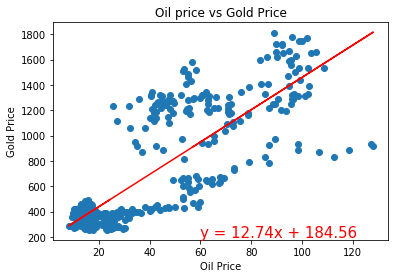

In [16]:
#Create Linear Regression
x_values = combined_data2['Crude_Oil_Price']
y_values = combined_data2['Monthly Gold AVG']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,200),fontsize=15,color="red")
plt.xlabel('Oil Price')
plt.ylabel('Gold Price')
plt.title("Oil price vs Gold Price")
plt.show()

In [17]:
oil = combined_data2.iloc[:, 2]
gold = combined_data2.iloc[:, 1]

correlation = st.pearsonr(oil, gold)

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.82


In [18]:
#Begin Sklearn for Gold

y= combined_data2["Monthly Gold AVG"].values.reshape(-1,1)
X= combined_data2["Crude_Oil_Price"].values.reshape(-1,1)

print("Shape: ", X.shape, y.shape)

Shape:  (421, 1) (421, 1)


In [19]:

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [20]:
##print(y_train)


x = pd.Series([temp[0] for temp in X_train]).astype(float)
y = pd.Series([temp[0] for temp in y_train]).astype(float)

print(y.shape)

correlation1 = st.pearsonr(x, y)

print(f"The correlation between both factors is {round(correlation1[0],2)}")

(315,)
The correlation between both factors is 0.84


In [21]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [22]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 87869.52304321392
R-squared (R2 ): 0.5422333244068409


In [24]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.5422333244068409